In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2022-03-28 14:07:52.978920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 14:07:52.979008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [3]:
dataset = pd.read_csv("Match_Data/matches.csv")
col = ['B_Top','B_Mid','B_Jg','B_Bot','B_Sup','R_Top','R_Mid','R_Jg','R_Bot','R_Sup']

In [4]:
dataset

,ID,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Top_Kills_5,B_Top_Kills_10,B_Top_Kills_15,B_Jg,B_Jg_Kills,...,R_Bot_KDA,R_Bot_Kills_5,R_Bot_Kills_10,R_Bot_Kills_15,R_Sup,R_Sup_Kills,R_Sup_KDA,R_Sup_Kills_5,R_Sup_Kills_10,R_Sup_Kills_15
0,4254552847,False,Jayce,5.0,1.200,1.0,1.0,2.0,Ekko,3.0,...,2.400000,0.0,0.0,0.0,Lux,4.0,2.300000,0.0,0.0,0.0
1,4251572080,True,Aatrox,3.0,1.500,1.0,1.0,1.0,Jarvan IV,10.0,...,0.875000,2.0,4.0,4.0,Leona,1.0,1.000000,0.0,0.0,1.0
2,4251403578,False,Camille,7.0,1.375,1.0,2.0,3.0,Master Yi,3.0,...,8.500000,0.0,0.0,3.0,Leona,1.0,10.000000,0.0,0.0,0.0
3,4250631950,False,Akali,9.0,2.500,0.0,2.0,4.0,Kayn,5.0,...,4.166667,3.0,3.0,4.0,Yuumi,1.0,5.200000,0.0,0.0,0.0
4,4249706191,True,Singed,4.0,14.000,0.0,2.0,2.0,Talon,13.0,...,0.857143,0.0,0.0,2.0,Nautilus,0.0,0.400000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,4209842291,True,Kled,9.0,5.000,0.0,2.0,5.0,Vi,9.0,...,1.666667,0.0,0.0,1.0,Xerath,2.0,1.500000,0.0,0.0,0.0
450,4209839751,False,Karma,0.0,0.800,0.0,0.0,0.0,Diana,5.0,...,4.250000,0.0,1.0,6.0,Rell,3.0,2.000000,0.0,0.0,1.0
451,4208591976,False,Viktor,2.0,0.875,1.0,1.0,1.0,Graves,4.0,...,4.333333,0.0,0.0,1.0,Bard,3.0,10.500000,0.0,1.0,1.0
452,4208537097,False,Dr. Mundo,3.0,1.000,0.0,0.0,1.0,Master Yi,9.0,...,14.000000,1.0,4.0,9.0,Vel'Koz,4.0,3.166667,1.0,3.0,3.0


In [5]:
dataset = dataset.drop(['ID'], axis=1)
dataset["B_Win"] = dataset["B_Win"].astype(int)

In [6]:
dataset.head()

,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Top_Kills_5,B_Top_Kills_10,B_Top_Kills_15,B_Jg,B_Jg_Kills,B_Jg_KDA,...,R_Bot_KDA,R_Bot_Kills_5,R_Bot_Kills_10,R_Bot_Kills_15,R_Sup,R_Sup_Kills,R_Sup_KDA,R_Sup_Kills_5,R_Sup_Kills_10,R_Sup_Kills_15
0,0,Jayce,5.0,1.200,1.0,1.0,2.0,Ekko,3.0,1.230769,...,2.400000,0.0,0.0,0.0,Lux,4.0,2.3,0.0,0.0,0.0
1,1,Aatrox,3.0,1.500,1.0,1.0,1.0,Jarvan IV,10.0,21.000000,...,0.875000,2.0,4.0,4.0,Leona,1.0,1.0,0.0,0.0,1.0
2,0,Camille,7.0,1.375,1.0,2.0,3.0,Master Yi,3.0,1.142857,...,8.500000,0.0,0.0,3.0,Leona,1.0,10.0,0.0,0.0,0.0
3,0,Akali,9.0,2.500,0.0,2.0,4.0,Kayn,5.0,1.545455,...,4.166667,3.0,3.0,4.0,Yuumi,1.0,5.2,0.0,0.0,0.0
4,1,Singed,4.0,14.000,0.0,2.0,2.0,Talon,13.0,4.000000,...,0.857143,0.0,0.0,2.0,Nautilus,0.0,0.4,0.0,0.0,0.0


In [7]:
dataset.dtypes

B_Win               int64
B_Top              object
B_Top_Kills       float64
B_Top_KDA         float64
B_Top_Kills_5     float64
                   ...   
R_Sup_Kills       float64
R_Sup_KDA         float64
R_Sup_Kills_5     float64
R_Sup_Kills_10    float64
R_Sup_Kills_15    float64
Length: 61, dtype: object

In [8]:
dataset = dataset.dropna()
df2 = dataset[col]
df2

,B_Top,B_Mid,B_Jg,B_Bot,B_Sup,R_Top,R_Mid,R_Jg,R_Bot,R_Sup
0,Jayce,Veigar,Ekko,Tahm Kench,Senna,Akali,Gragas,Talon,Jhin,Lux
1,Aatrox,Akali,Jarvan IV,Aphelios,Soraka,Mordekaiser,Karma,Viego,Ezreal,Leona
2,Camille,Yasuo,Master Yi,Ezreal,Nautilus,Irelia,Katarina,Rammus,Kai'Sa,Leona
3,Akali,Cassiopeia,Kayn,Xayah,Thresh,Fiora,Yasuo,Jarvan IV,Kai'Sa,Yuumi
4,Singed,Ahri,Talon,Ashe,Blitzcrank,Akali,Lissandra,Graves,Jhin,Nautilus
...,...,...,...,...,...,...,...,...,...,...
449,Kled,Viktor,Vi,Varus,Sona,Aatrox,Cassiopeia,Xin Zhao,Jhin,Xerath
450,Karma,Akshan,Diana,Aphelios,Swain,Garen,Cassiopeia,Lee Sin,Draven,Rell
451,Viktor,Corki,Graves,Ashe,Karma,Urgot,Ryze,Evelynn,Caitlyn,Bard
452,Dr. Mundo,Zed,Master Yi,Aphelios,Lulu,Tahm Kench,Anivia,Poppy,Ezreal,Vel'Koz


In [9]:
df = pd.get_dummies(dataset, columns = dataset.select_dtypes(['object']).columns)
# df = dataset.drop(col, axis=1)
# df = pd.concat([df,one_hot_encoded_data], ignore_index=True)

In [10]:
df.head()

,B_Win,B_Top_Kills,B_Top_KDA,B_Top_Kills_5,B_Top_Kills_10,B_Top_Kills_15,B_Jg_Kills,B_Jg_KDA,B_Jg_Kills_5,B_Jg_Kills_10,...,R_Sup_Taliyah,R_Sup_Taric,R_Sup_Thresh,R_Sup_Veigar,R_Sup_Vel'Koz,R_Sup_Xerath,R_Sup_Yuumi,R_Sup_Zac,R_Sup_Zilean,R_Sup_Zyra
0,0,5.0,1.200,1.0,1.0,2.0,3.0,1.230769,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,1.500,1.0,1.0,1.0,10.0,21.000000,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,7.0,1.375,1.0,2.0,3.0,3.0,1.142857,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0,9.0,2.500,0.0,2.0,4.0,5.0,1.545455,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,1,4.0,14.000,0.0,2.0,2.0,13.0,4.000000,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.iloc[:,1:]

,B_Top_Kills,B_Top_KDA,B_Top_Kills_5,B_Top_Kills_10,B_Top_Kills_15,B_Jg_Kills,B_Jg_KDA,B_Jg_Kills_5,B_Jg_Kills_10,B_Jg_Kills_15,...,R_Sup_Taliyah,R_Sup_Taric,R_Sup_Thresh,R_Sup_Veigar,R_Sup_Vel'Koz,R_Sup_Xerath,R_Sup_Yuumi,R_Sup_Zac,R_Sup_Zilean,R_Sup_Zyra
0,5.0,1.200,1.0,1.0,2.0,3.0,1.230769,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1.500,1.0,1.0,1.0,10.0,21.000000,0.0,1.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,1.375,1.0,2.0,3.0,3.0,1.142857,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,2.500,0.0,2.0,4.0,5.0,1.545455,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,4.0,14.000,0.0,2.0,2.0,13.0,4.000000,1.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,9.0,5.000,0.0,2.0,5.0,9.0,6.666667,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
450,0.0,0.800,0.0,0.0,0.0,5.0,0.857143,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
451,2.0,0.875,1.0,1.0,1.0,4.0,0.857143,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
452,3.0,1.000,0.0,0.0,1.0,9.0,1.571429,1.0,4.0,8.0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.15, random_state=0)

In [13]:
X_train.shape

(378, 610)

In [16]:
model_one_hot = keras.Sequential() # create model

model_one_hot.add(layers.Dense(64, input_dim=610, activation='relu')) # Input layer

model_one_hot.add(layers.Dense(1, activation='sigmoid')) # output layer

model_one_hot.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_one_hot.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                39104     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,169
Trainable params: 39,169
Non-trainable params: 0
_________________________________________________________________


In [17]:
fit_model_one_hot = model_one_hot.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 0.8477 - acc: 0.5106 - val_loss: 0.4694 - val_acc: 0.8060
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2708 - acc: 0.9233 - val_loss: 0.2619 - val_acc: 0.8955
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1694 - acc: 0.9444 - val_loss: 0.2063 - val_acc: 0.9104
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1360 - acc: 0.9471 - val_loss: 0.1830 - val_acc: 0.9104
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1107 - acc: 0.9630 - val_loss: 0.1710 - val_acc: 0.9254
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0948 - acc: 0.9709 - val_loss: 0.1558 - val_acc: 0.9254
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0806 - acc: 0.9788 - val_loss: 0.1530 - val_acc: 0.9254
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0703 - acc: 0.9

In [ ]:
dataset

,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Top_Kills_5,B_Top_Kills_10,B_Top_Kills_15,B_Jg,B_Jg_Kills,B_Jg_KDA,...,R_Bot_KDA,R_Bot_Kills_5,R_Bot_Kills_10,R_Bot_Kills_15,R_Sup,R_Sup_Kills,R_Sup_KDA,R_Sup_Kills_5,R_Sup_Kills_10,R_Sup_Kills_15
0,0,Jayce,5.0,1.200000,1.0,1.0,2.0,Ekko,3.0,1.230769,...,2.400000,0.0,0.0,0.0,Lux,4.0,2.300000,0.0,0.0,0.0
1,1,Aatrox,3.0,1.500000,1.0,1.0,1.0,Jarvan IV,10.0,21.000000,...,0.875000,2.0,4.0,4.0,Leona,1.0,1.000000,0.0,0.0,1.0
2,0,Camille,7.0,1.375000,1.0,2.0,3.0,Master Yi,3.0,1.142857,...,8.500000,0.0,0.0,3.0,Leona,1.0,10.000000,0.0,0.0,0.0
3,0,Akali,9.0,2.500000,0.0,2.0,4.0,Kayn,5.0,1.545455,...,4.166667,3.0,3.0,4.0,Yuumi,1.0,5.200000,0.0,0.0,0.0
4,1,Singed,4.0,14.000000,0.0,2.0,2.0,Talon,13.0,4.000000,...,0.857143,0.0,0.0,2.0,Nautilus,0.0,0.400000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1,Camille,12.0,2.833333,1.0,2.0,4.0,Rengar,11.0,3.000000,...,1.444444,1.0,1.0,1.0,Bard,3.0,3.000000,0.0,1.0,1.0
185,1,Gangplank,8.0,7.500000,0.0,1.0,2.0,Lee Sin,4.0,13.000000,...,0.375000,0.0,1.0,1.0,Sona,2.0,1.333333,0.0,0.0,1.0
186,0,Akshan,10.0,2.272727,1.0,2.0,3.0,Lee Sin,11.0,3.100000,...,3.142857,0.0,1.0,1.0,Sylas,7.0,1.166667,0.0,0.0,2.0
187,0,Gwen,12.0,2.285714,0.0,1.0,4.0,Viego,5.0,1.111111,...,5.666667,0.0,0.0,1.0,Soraka,2.0,6.250000,0.0,1.0,1.0


In [18]:
dataset_categoriical = dataset

In [ ]:
# for col_name in dataset_categoriical.columns:
#         dataset_categoriical[col_name]= dataset_categoriical[col_name].astype('category').cat.codes
dataset_categoriical.select_dtypes('object').columns = dataset_categoriical.select_dtypes(['object']).apply(lambda x: x.astype('category'))
dataset_categoriical[col].dtypes

ValueError: Length mismatch: Expected axis has 10 elements, new values have 184 elements

In [19]:
col = ['B_Top','B_Mid','B_Jg','B_Bot','B_Sup','R_Top','R_Mid','R_Jg','R_Bot','R_Sup']

dataset_categoriical[col] = dataset_categoriical[col].apply(lambda x: x.astype('category'))

burner = dataset_categoriical.select_dtypes(['category']).columns
dataset_categoriical[burner] = dataset_categoriical[burner].apply(lambda x: x.cat.codes)

In [20]:
dataset_categoriical.dtypes

B_Win               int64
B_Top                int8
B_Top_Kills       float64
B_Top_KDA         float64
B_Top_Kills_5     float64
                   ...   
R_Sup_Kills       float64
R_Sup_KDA         float64
R_Sup_Kills_5     float64
R_Sup_Kills_10    float64
R_Sup_Kills_15    float64
Length: 61, dtype: object

In [21]:
dataset_categoriical.select_dtypes('int64')[0:] = dataset_categoriical.select_dtypes(['int64'])[0:].apply(lambda x: x.astype('float32'))
dataset_categoriical.select_dtypes('int64')[0:1]

,B_Win
0,0


In [22]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(dataset_categoriical.iloc[:,1:], dataset_categoriical.iloc[:,0], test_size=0.15, random_state=0)

In [23]:
X_train_2.shape

(378, 60)

In [24]:
model_categorical = keras.Sequential() # create model

model_categorical.add(layers.Dense(150, input_dim=60, activation='relu')) # Input layer

model_categorical.add(layers.Dense(150, activation='relu')) # Input layer

model_categorical.add(layers.Dense(1, activation='sigmoid')) # output layer

model_categorical.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_categorical.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               9150      
                                                                 
 dense_5 (Dense)             (None, 150)               22650     
                                                                 
 dense_6 (Dense)             (None, 1)                 151       
                                                                 
Total params: 31,951
Trainable params: 31,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
# validation_data=(X_test, Y_test)
fit_model_categorical = model_categorical.fit(X_train_2, Y_train_2, validation_data=(X_test_2, Y_test_2), epochs=40)

Epoch 1/40
12/12 [==============================] - 1s 16ms/step - loss: 1.5029 - acc: 0.5688 - val_loss: 0.6477 - val_acc: 0.7313
Epoch 2/40
12/12 [==============================] - 0s 6ms/step - loss: 0.5233 - acc: 0.7619 - val_loss: 0.3503 - val_acc: 0.8657
Epoch 3/40
12/12 [==============================] - 0s 7ms/step - loss: 0.2851 - acc: 0.8783 - val_loss: 0.2781 - val_acc: 0.8806
Epoch 4/40
12/12 [==============================] - 0s 6ms/step - loss: 0.1618 - acc: 0.9444 - val_loss: 0.1671 - val_acc: 0.9254
Epoch 5/40
12/12 [==============================] - 0s 6ms/step - loss: 0.1218 - acc: 0.9603 - val_loss: 0.1914 - val_acc: 0.9403
Epoch 6/40
12/12 [==============================] - 0s 6ms/step - loss: 0.0919 - acc: 0.9815 - val_loss: 0.1648 - val_acc: 0.9403
Epoch 7/40
12/12 [==============================] - 0s 6ms/step - loss: 0.0730 - acc: 0.9841 - val_loss: 0.1617 - val_acc: 0.9403
Epoch 8/40
12/12 [==============================] - 0s 6ms/step - loss: 0.0633 - acc: 0.9

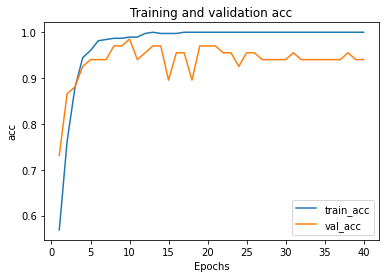

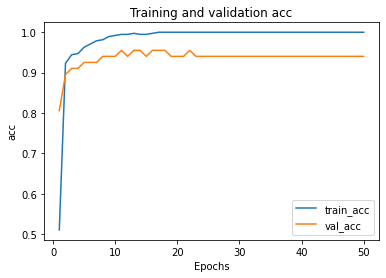

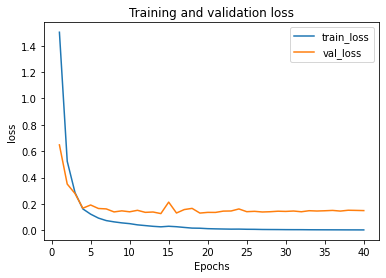

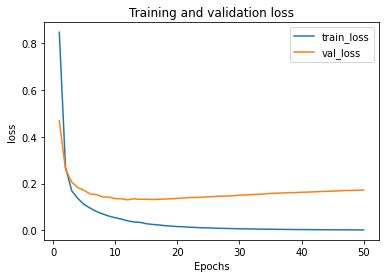

In [26]:
plot_metric(fit_model_categorical,'acc')
plot_metric(fit_model_one_hot,'acc')
plot_metric(fit_model_categorical,'loss')
plot_metric(fit_model_one_hot,'loss')